In [1]:
import scipy.io
import numpy as np
import pandas as pd

In [2]:
mat = scipy.io.loadmat('china//data//data_00001.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 10 12:44:24 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecg': array([[-0.13405921],
        [-0.21474772],
        [-0.22356306],
        ...,
        [ 0.00581536],
        [ 0.01781873],
        [ 0.02576693]])}

In [4]:
mat['ecg'].shape

(5000, 1)

In [5]:
ref = scipy.io.loadmat('china//ref//R_00001.mat')

In [6]:
max(ref['R_peak'].shape)

16

In [7]:
def get_dataset():
    data = []
    for i in range(1, 2001, 1):
        mat = scipy.io.loadmat("china//data//data_{:05d}.mat".format(i))
        ref = scipy.io.loadmat("china//ref//R_{:05d}.mat".format(i))
        ecg = np.reshape(mat["ecg"], (5000,))
        r_peak = np.reshape(ref["R_peak"], (max(ref['R_peak'].shape),)).astype(np.int32)
        is_r_peak = np.zeros((5000,), dtype=np.int32)
        is_r_peak[r_peak] = 1
        data.append({"ecg": ecg,
                        "is_r_peak": is_r_peak,
                       "r_peak": r_peak})
    return pd.DataFrame.from_dict(data, orient='columns')
        

In [8]:
dataset = get_dataset()

In [9]:
dataset.head()

,ecg,is_r_peak,r_peak
0,"[-0.13405921413885352, -0.21474771537475584, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[381, 674, 969, 1198, 1556, 1845, 2138, 2431, ..."
1,"[0.47198353280431776, 0.6738849259204285, 0.57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[385, 661, 974, 1207, 1557, 1832, 2142, 2420, ..."
2,"[0.5275130125839788, 0.7764709089168801, 0.729...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[387, 674, 976, 1198, 1558, 1845, 2144, 2430, ..."
3,"[-0.4074087051006681, -0.6210424172689245, -0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 659, 976, 1202, 1559, 1833, 2146, 2415, ..."
4,"[0.6138668013405897, 0.9190979337867135, 0.891...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 668, 977, 1202, 1560, 1839, 2145, 2418, ..."


In [10]:
from basics import bandpass

In [11]:
dataset['filtered_ecg'] = dataset["ecg"].apply(lambda ecg: bandpass(ecg, 500, 5, 20))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [12]:
dataset.head()

,ecg,is_r_peak,r_peak,filtered_ecg
0,"[-0.13405921413885352, -0.21474771537475584, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[381, 674, 969, 1198, 1556, 1845, 2138, 2431, ...","[0.017987810034344624, -0.005662051942027946, ..."
1,"[0.47198353280431776, 0.6738849259204285, 0.57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[385, 661, 974, 1207, 1557, 1832, 2142, 2420, ...","[0.4036047122071404, 0.4577150548226904, 0.508..."
2,"[0.5275130125839788, 0.7764709089168801, 0.729...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[387, 674, 976, 1198, 1558, 1845, 2144, 2430, ...","[0.12871205396174232, 0.18530328118011083, 0.2..."
3,"[-0.4074087051006681, -0.6210424172689245, -0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 659, 976, 1202, 1559, 1833, 2146, 2415, ...","[0.06715089333035167, 0.021716561527150534, -0..."
4,"[0.6138668013405897, 0.9190979337867135, 0.891...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 668, 977, 1202, 1560, 1839, 2145, 2418, ...","[-0.10702094409950397, -0.05172280791316643, 0..."


In [13]:
import matplotlib.pyplot as plt

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

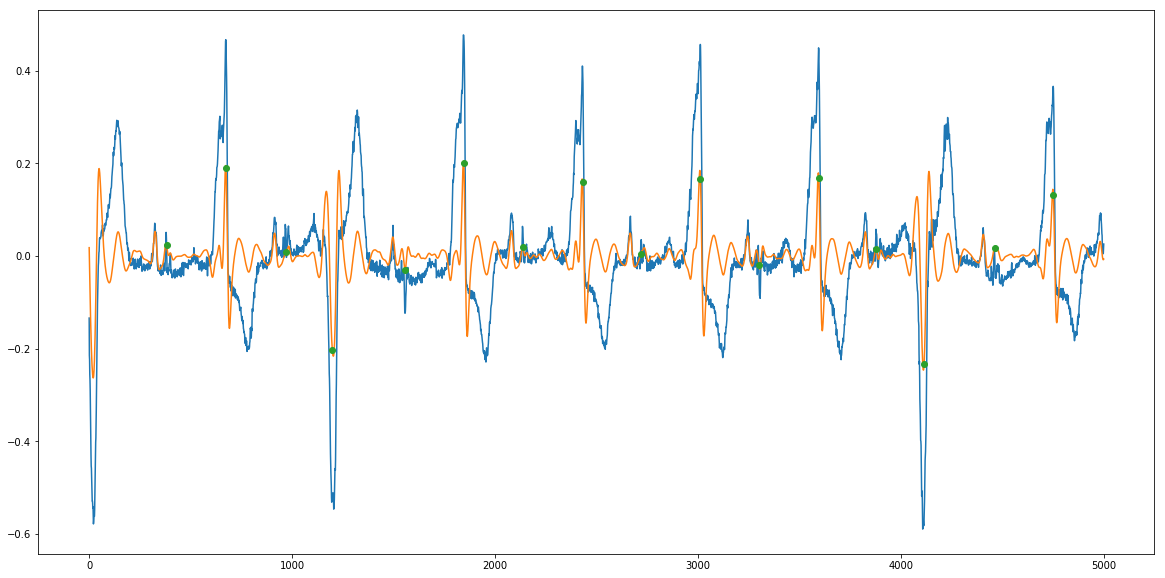

In [15]:
plt.plot(dataset["ecg"][0])
plt.plot(dataset["filtered_ecg"][0])
plt.plot(dataset["r_peak"][0], dataset["filtered_ecg"][0][dataset["r_peak"][0]], 'o')

In [16]:
import torch
torch.cuda.is_available()

True

In [17]:
from torch.utils.data import Dataset, DataLoader

In [18]:
SOS_TOKEN = -1
EOS_TOKEN = 5001

In [19]:
def get_mean_and_std(dataset, column):
    data = [np.array(row) for row in dataset[column].values.copy()]
    data = np.array(data)
    return data.mean(), data.std()

In [20]:
get_mean_and_std(dataset, 'ecg')

(-0.00037255557433632573, 0.3612009818882442)

In [21]:
np.array(list(set(np.concatenate([[1,2,3],[0,1,2]]))))

array([0, 1, 2, 3])

In [22]:
class EcgDataset(Dataset):
    def __init__(self, data, crop_size = 5000, use_raw = True, pre_faked = 0, post_faked = 0):
        self.data = data
        self.crop_size = crop_size
        self.use_raw = use_raw
        used_data = data.ecg if use_raw else data.filtered_ecg
        used_data = [np.array(row) for row in used_data.values.copy()]
        used_data = np.array(used_data)
        self.values = (used_data - used_data.mean())/used_data.std()
        self.pre_faked = pre_faked
        self.post_faked = post_faked
        
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        cut_point = 0 if self.crop_size >= 5000 else np.random.randint(5001 - self.crop_size)
        ecg = self.values[idx][cut_point:cut_point+self.crop_size]
        peaks = self.data['r_peak'].iloc[idx]
        faked = [peaks]
        for i_pre in range(1, self.pre_faked+1):
            faked.append(peaks - i_pre)
            
        for i_post in range(1, self.post_faked+1):
            faked.append(peaks + i_post)
        
        peaks = np.array(list(set(np.concatenate(faked))))
        peaks.sort()
        
        points = np.array([point-cut_point  for point in peaks if point >= cut_point and point < cut_point + self.crop_size])
        
        labels = np.zeros((self.crop_size,))
        try:
            labels[points] = 1
        except:
            print("Points exception!", points)
        
        return ecg, np.flip(labels).copy()

In [23]:
ecg_dataset = EcgDataset(dataset, 3000, False, pre_faked=5, post_faked=1)

In [24]:
ecg_dataset[0]

(array([-0.08734881, -0.07488375, -0.05942956, ..., -0.19017637,
        -0.18823319, -0.17785461]), array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
ecg_dataset.values.std()

1.0

In [26]:
valid_size = 0.1
random_seed = 7

num_train = len(dataset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))


np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_dataset = EcgDataset(dataset.iloc[train_idx], 3000, False)
valid_dataset = EcgDataset(dataset.iloc[valid_idx], 3000, False)

In [27]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [29]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.input_dim = input_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.dropout = dropout
        
        self.rnn = nn.LSTM(input_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dropout = nn.Dropout(dropout)
        
    def init_hidden(self, batch_size):
        return torch.zeros((self.n_layers, batch_size, self.hid_dim), dtype = torch.float)
    
    def init_cell(self, batch_size):
        return torch.zeros((self.n_layers, batch_size, self.hid_dim), dtype = torch.float)
        
    def forward(self, src, h0, c0):
        
        #src = [seq len, batch size, input dim]
        #print(src.shape)
        
        outputs, (hidden, cell) = self.rnn(src, (h0, c0))
        
        
        #print(outputs.shape)
        
        #outputs = [seq_len, batch,  hidden_size]
        #hidden = [num_layers, batch, hidden_size]
        #cell = [num_layers, batch, hidden_size]
        
        #outputs are always from the top hidden layer
        
        return hidden, cell

In [30]:
encoder = Encoder(1, 16, 2, 0.01)

In [31]:
ecg, labels = ecg_dataset[0]
ecg = torch.tensor([ecg]).view(-1, 1, 1).float()
labels = torch.tensor([labels]).view(-1, 1, 1).float()

In [32]:
h0 = encoder.init_hidden(1)
c0 = encoder.init_cell(1)

In [33]:
hidden, cell = encoder(ecg, h0, c0)

In [34]:
hidden.shape

torch.Size([2, 1, 16])

In [35]:
class Decoder(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.input_dim = input_dim
        self.hid_dim = hid_dim
        self.output_dim = output_dim
        self.n_layers = n_layers
        self.dropout = dropout
        
        self.rnn = nn.LSTM(input_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dense_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell):
        
        #input = [batch size, output_size]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]
        
        input = input.unsqueeze(0)
        #print(input.shape)
        
        #input = [1, batch size, output_size]
                
        output, (hidden, cell) = self.rnn(input, (hidden, cell))
        
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        prediction = self.dense_out(output.squeeze(0))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden, cell

In [36]:
decoder = Decoder(1, 1, 16, 2, 0.01)

In [37]:
pred, hidden2, cell2 = decoder(labels[0], hidden, cell)

In [38]:
pred

tensor([[0.0958]], grad_fn=<AddmmBackward>)

In [39]:
hidden2.shape

torch.Size([2, 1, 16])

In [40]:
import random

In [41]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, embedding,  device):
        super().__init__()
        
        self.SOS = 2
        
        self.embedding = embedding.to(device)
        self.encoder = encoder.to(device)
        self.decoder = decoder.to(device)
        self.device = device
        self.sigmoid = nn.Sigmoid()
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg):
        
        #src = [src seq len, batch size, input dim]
        #trg = [trg seq len, batch size, output dim]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
        src = src.to(self.device)
        trg = trg.to(self.device)
        
        batch_size = trg.shape[1]
        max_len = trg.shape[0]
        
        #encoder init states
        h0 = encoder.init_hidden(batch_size).to(self.device)
        c0 = encoder.init_cell(batch_size).to(self.device)
        
        #tensor to store decoder outputs
        outputs = torch.zeros(max_len, batch_size, 1).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src, h0, c0)
        
        #first input to the decoder is the <sos> tokens
        input = self.SOS * torch.ones(batch_size, device = self.device, dtype = torch.int64)
        input = self.embedding(input)
        
        for t in range(0, max_len):
        
            output, hidden, cell = self.decoder(input, hidden, cell)
            output = self.sigmoid(output)
            outputs[t] = output
            
            input = torch.empty_like(output).copy_(output)
            ones = self.embedding(torch.ones(batch_size, device = self.device, dtype = torch.int64))
            zeros = self.embedding(torch.zeros(batch_size, device = self.device, dtype = torch.int64))
            input = input*ones + (1-input)*zeros
            
        
        return outputs

In [42]:
embedding = nn.Embedding(3, 16)

In [43]:
encoder = Encoder(1, 16, 2, 0.01)

In [44]:
decoder = Decoder(16, 1, 16, 2, 0.01)

In [45]:
seq2seq = Seq2Seq(encoder, decoder, embedding, "cpu")

In [46]:
pred = seq2seq(ecg, labels)

In [47]:
pred.shape

torch.Size([3000, 1, 1])

In [48]:
def plot_ecg(ecg, pred):
    # Create some mock data
    t = range(len(ecg))

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('ecg', color=color)
    ax1.plot(t, ecg, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('prediction', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, np.flip(pred), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

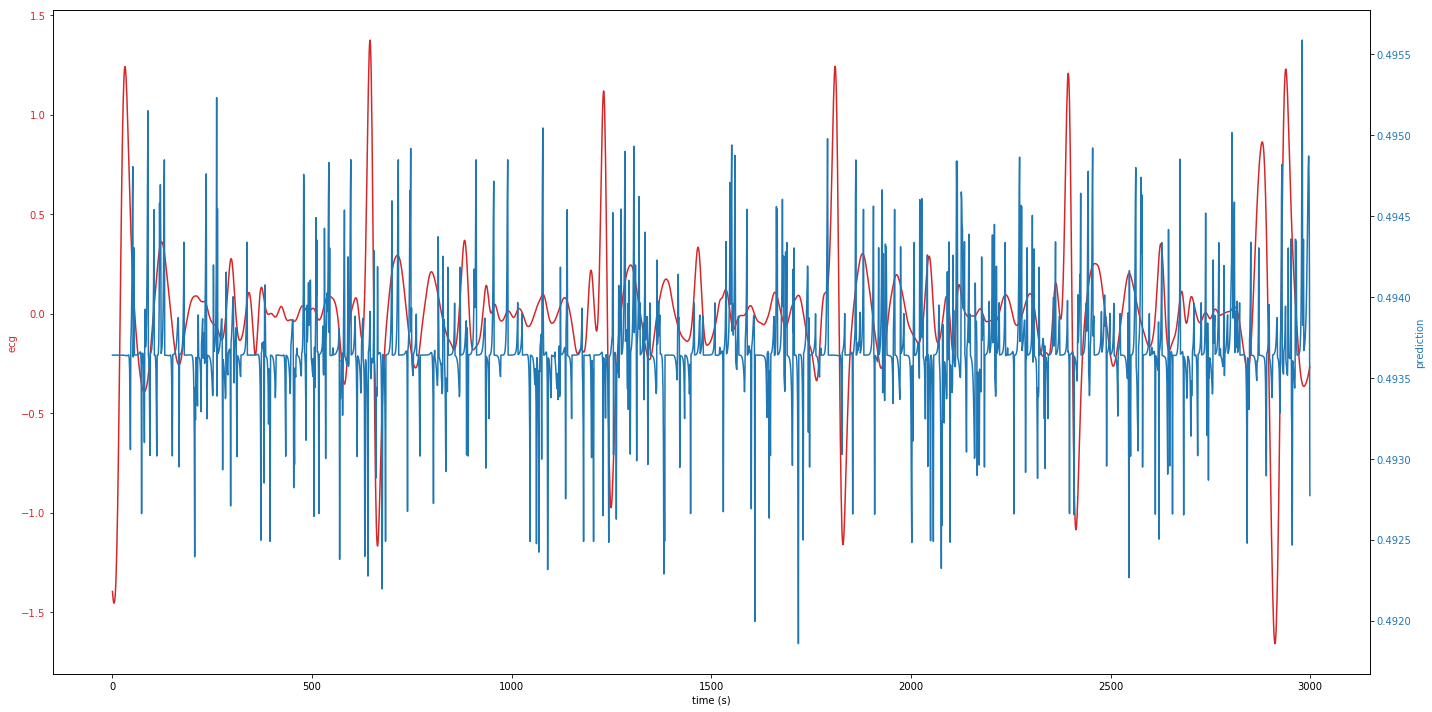

In [49]:
plot_ecg(ecg.transpose(0, 1)[0].squeeze().detach().numpy(),pred.transpose(0, 1)[0].squeeze().detach().numpy())

In [50]:
device = "cuda:0"

In [51]:
embedding = nn.Embedding(3, 100)
encoder = Encoder(1, 100, 4, 0.01)
decoder = Decoder(100, 1, 100, 4 , 0.01)
model = Seq2Seq(encoder, decoder, embedding, device)

In [52]:
np.flip([[1,2,3], [4,5,6]], 1)

array([[3, 2, 1],
       [6, 5, 4]])

In [53]:
def weighted_binary_cross_entropy(output, target, weights=None):
        
    if weights is not None:
        assert len(weights) == 2
        
        loss = weights[1] * (target * torch.log(output)) + weights[0] * ((1 - target) * torch.log(1 - output))
    else:
        loss = target * torch.log(output) + (1 - target) * torch.log(1 - output)

    return torch.neg(torch.mean(loss))

In [65]:
def train(model, dataset, n_epoch, optimizer, beat_weight=100, print_every = 100, plot_every = 300):
    model.train()
    total_step = len(train_loader)
    for epoch in range(n_epoch):
        epoch_loss = 0
        

        for i, (ecg, labels) in enumerate(train_loader):
            
            src = ecg.transpose(0,1).to(device).unsqueeze(2).float()
            trg = labels.transpose(0,1).to(device).unsqueeze(2).float()

            optimizer.zero_grad()

            output = model(src, trg)

            loss = criterion(output, trg )

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i % print_every == 0):
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, n_epoch, i+1, total_step, loss.item()))
                
            if (i % plot_every == 0):
                plot_ecg(
                    src.transpose(0, 1)[0].squeeze().detach().cpu().numpy(),
                    output.transpose(0, 1)[0].squeeze().detach().cpu().numpy()
                )
        
    
    

In [66]:
train_dataset.pre_faked = 0
train_dataset.post_faked = 0
train_dataset.crop_size = 2000

In [67]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle = True)

In [68]:
train_dataset[0][0].shape

(2000,)

In [69]:
for ecg, labels in train_loader:
    print(ecg.shape)
    print(labels.shape)
    break

torch.Size([8, 2000])
torch.Size([8, 2000])


In [70]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.BCELoss()

Epoch [1/50], Step [1/225], Loss: 0.7014


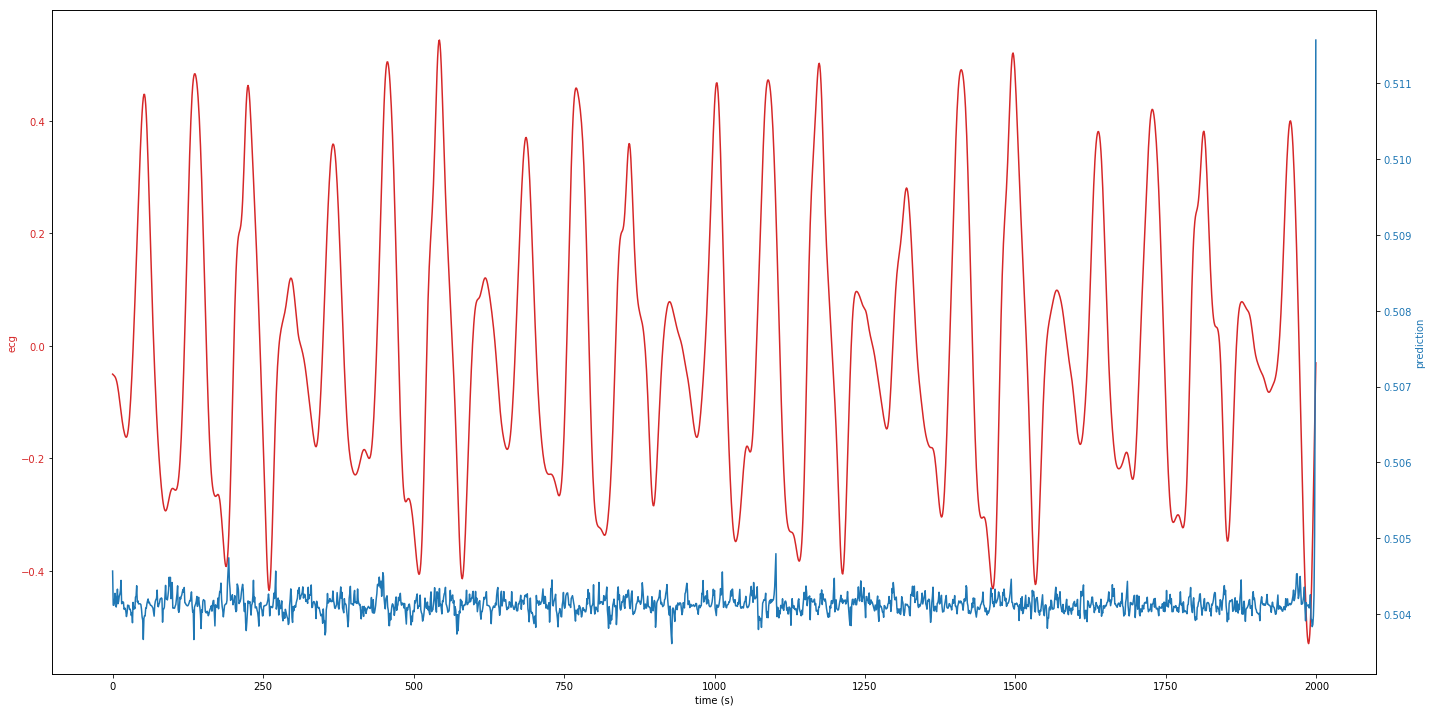

Epoch [1/50], Step [3/225], Loss: 0.0447
Epoch [1/50], Step [5/225], Loss: 0.0254
Epoch [1/50], Step [7/225], Loss: 0.0204
Epoch [1/50], Step [9/225], Loss: 0.0229


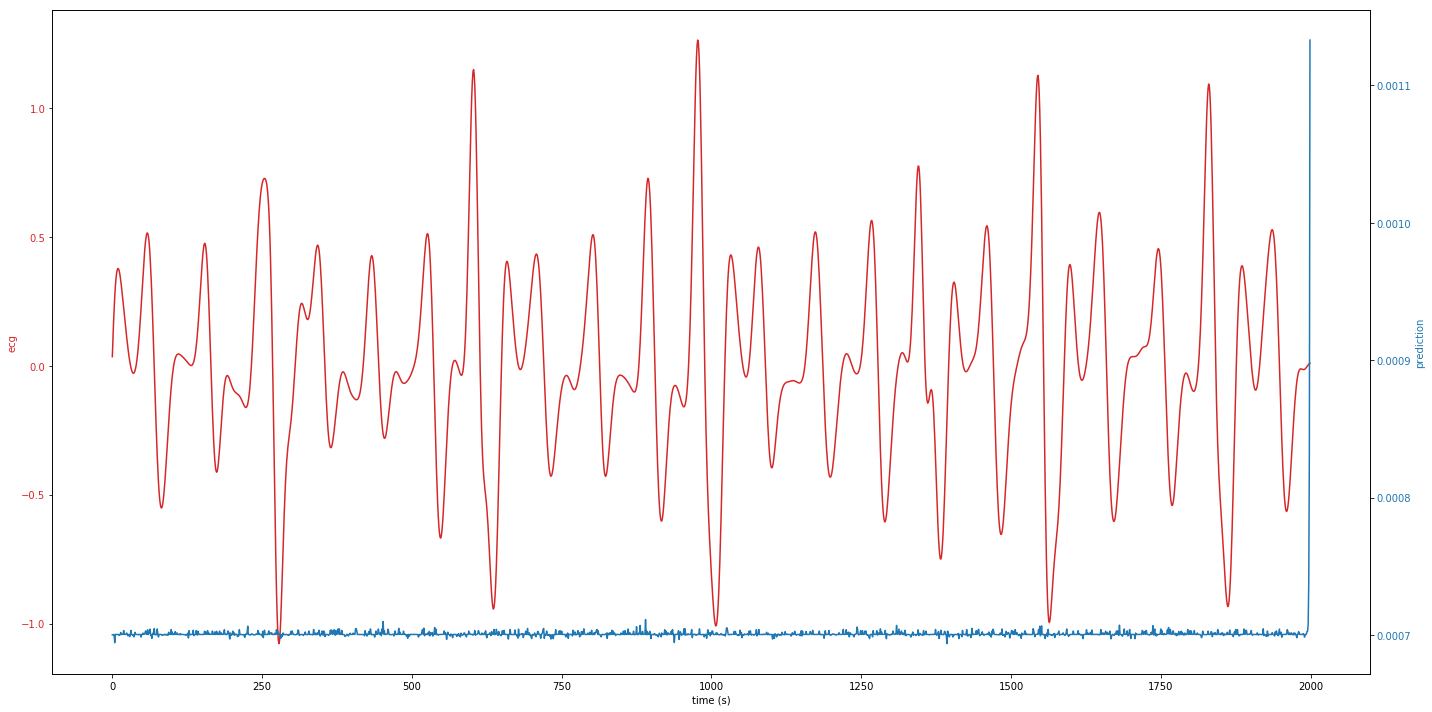

Epoch [1/50], Step [11/225], Loss: 0.0209
Epoch [1/50], Step [13/225], Loss: 0.0243
Epoch [1/50], Step [15/225], Loss: 0.0216
Epoch [1/50], Step [17/225], Loss: 0.0256


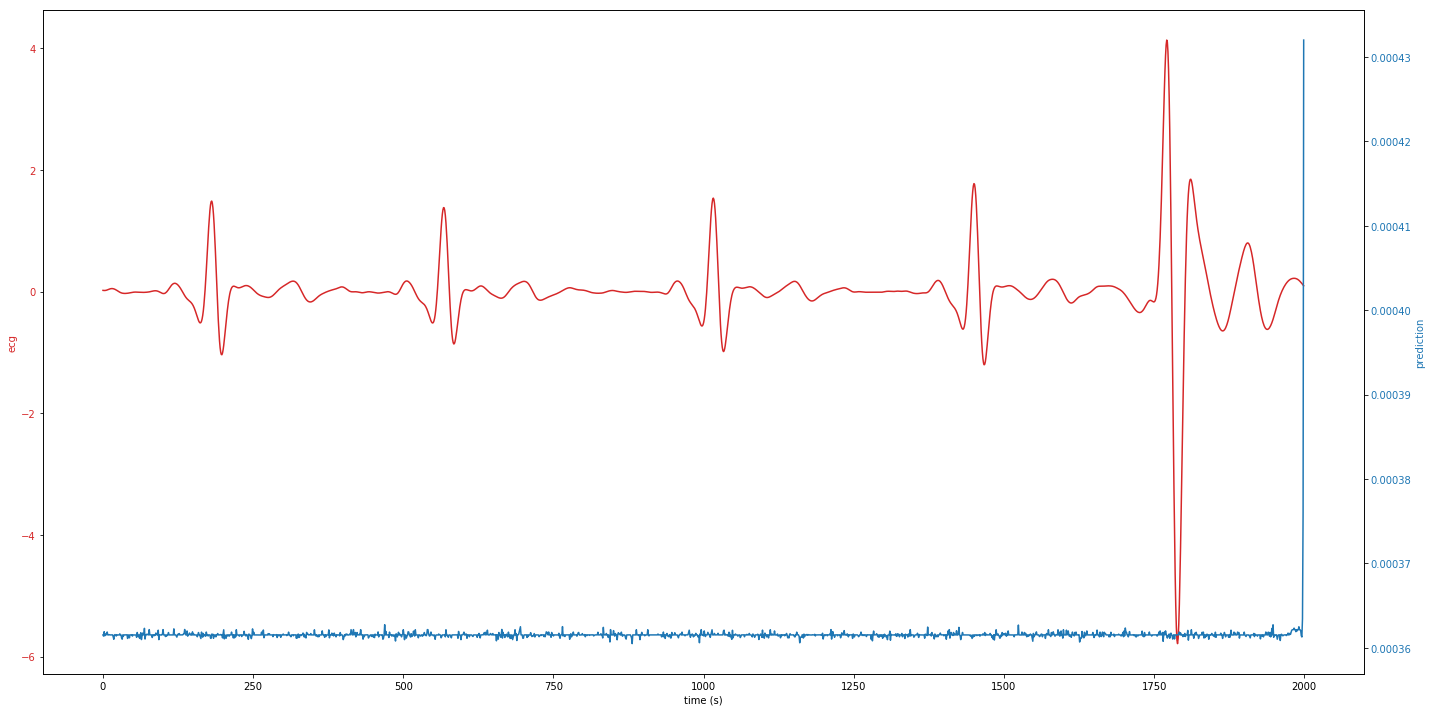

Epoch [1/50], Step [19/225], Loss: 0.0230
Epoch [1/50], Step [21/225], Loss: 0.0267
Epoch [1/50], Step [23/225], Loss: 0.0224
Epoch [1/50], Step [25/225], Loss: 0.0197


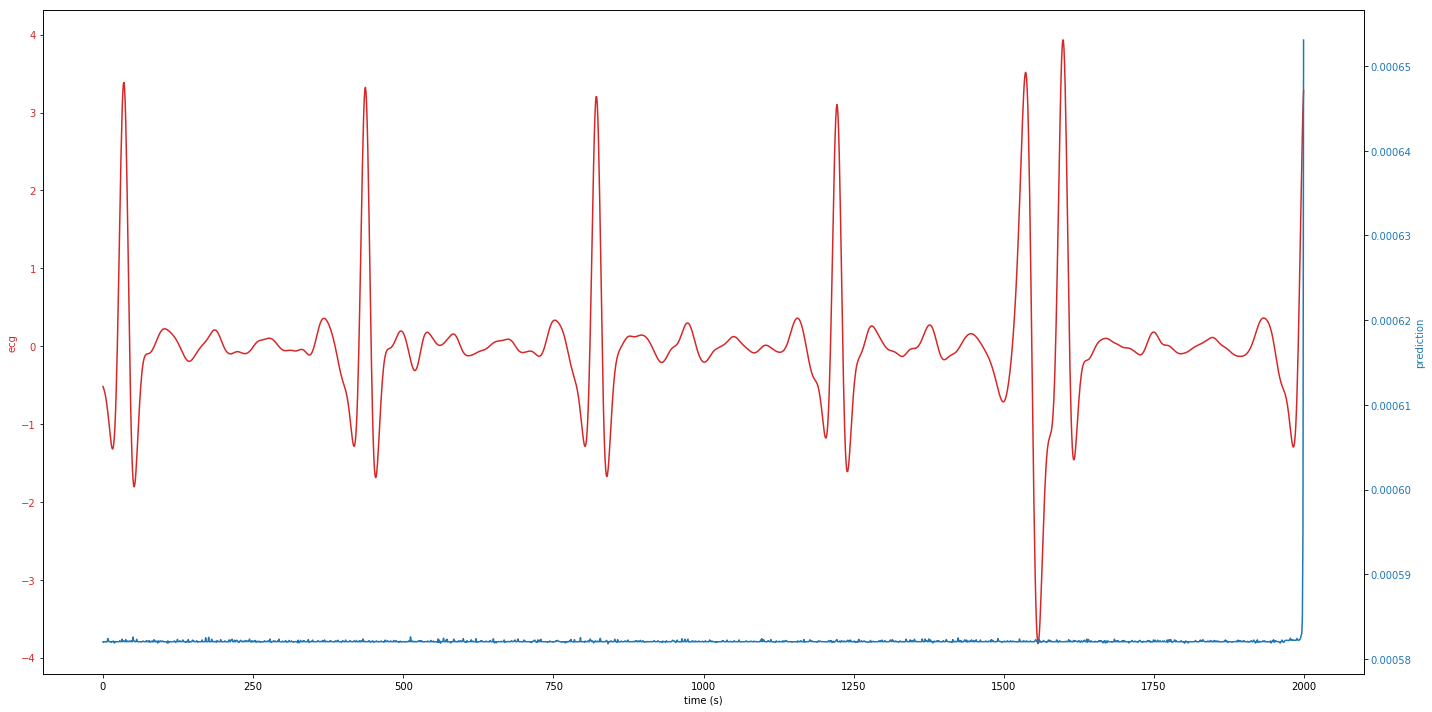

Epoch [1/50], Step [27/225], Loss: 0.0188
Epoch [1/50], Step [29/225], Loss: 0.0258
Epoch [1/50], Step [31/225], Loss: 0.0213
Epoch [1/50], Step [33/225], Loss: 0.0229


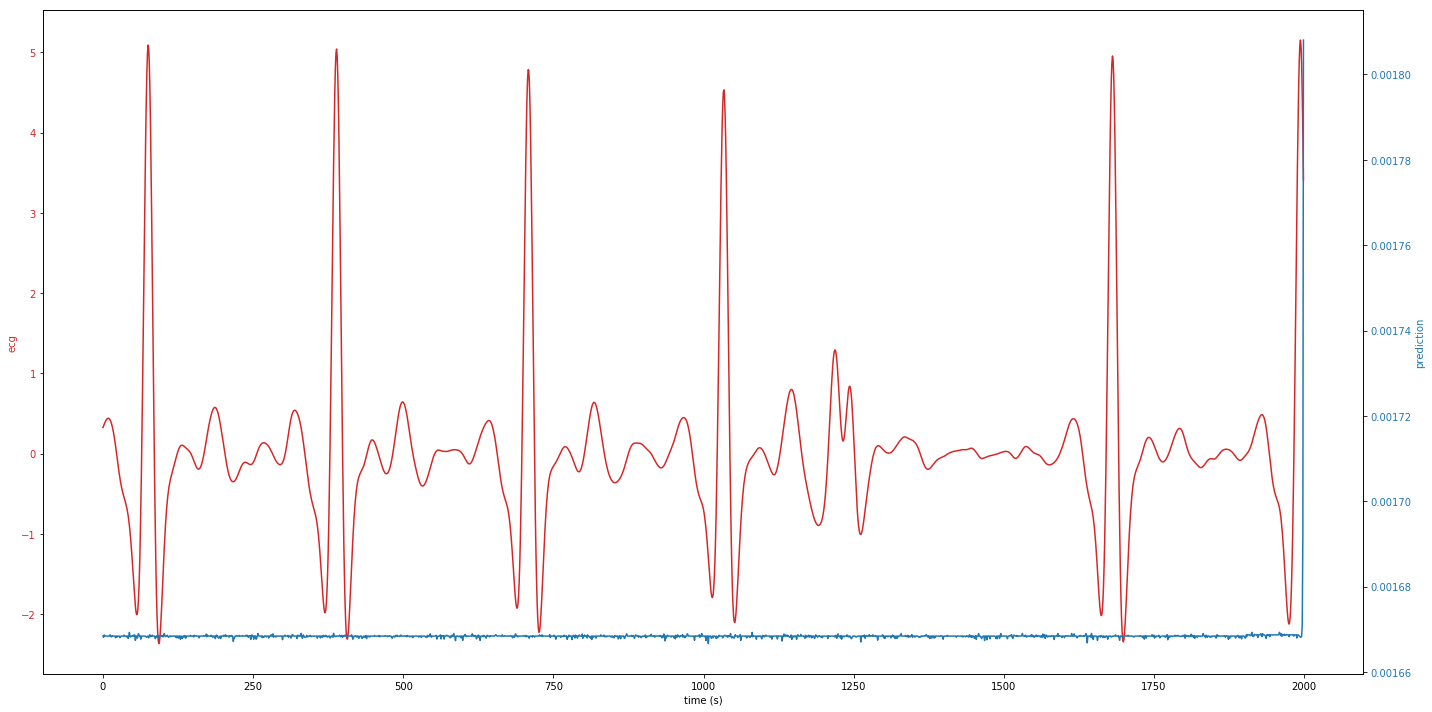

Epoch [1/50], Step [35/225], Loss: 0.0209
Epoch [1/50], Step [37/225], Loss: 0.0197
Epoch [1/50], Step [39/225], Loss: 0.0180
Epoch [1/50], Step [41/225], Loss: 0.0203


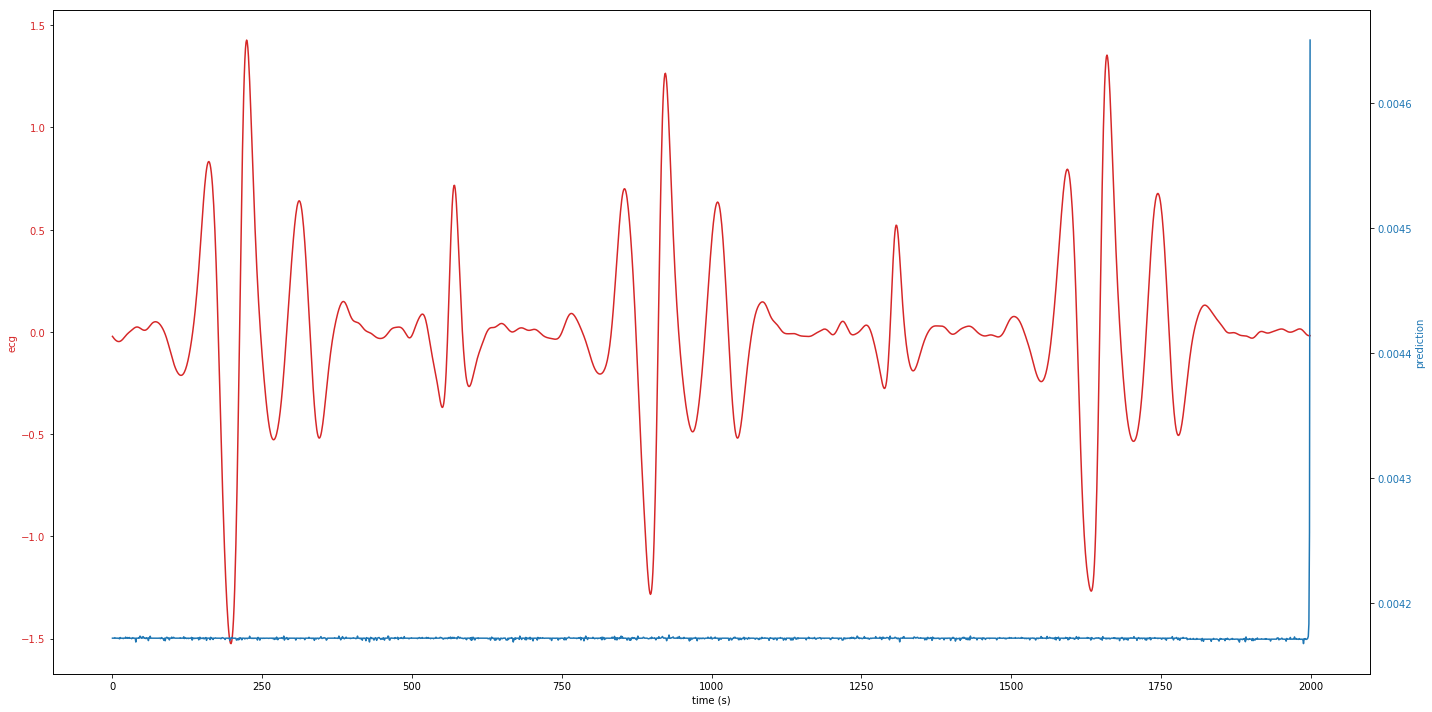

Epoch [1/50], Step [43/225], Loss: 0.0200


In [ ]:
train(model, train_dataset, 50, optimizer, beat_weight=300, print_every=2, plot_every = 8)

In [ ]:
train(model, train_dataset, 1000, optimizer, print_every=2, plot_every = 8)